In [1]:
pip install pyperclip

Note: you may need to restart the kernel to use updated packages.


# Credit Card Marketing Project

<div class="alert alert-block alert-info">


Table Content:

* [Introduction](#Introduction)
* [Preparation](#Preparation)
* [Exploring Data Step 1](#EDA-Step-1)
* [Modeling: Model N1](#Modeling:-Model-N1)
* [Modeling: Model N2](#Modeling:-Model-N2)
* [Modeling: Model N3](#Modeling:-Model-N3)
* [Modeling: Model N4](#Modeling:-Model-N4)



</div>


### Introduction
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In this notebook, I will present my project. 
Here is my Project Management Dashboard: Trello link

### Preparation - import data
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [86]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [147]:
#importing dataset and taking a look
data = pd.read_excel('creditcardmarketing.xlsx')
data

Customer Number Offer Accepted     Reward Mailer Type Income Level  \
0                    1             No  Air Miles      Letter         High   
1                    2             No  Air Miles      Letter       Medium   
2                    3             No  Air Miles    Postcard         High   
3                    4             No  Air Miles      Letter       Medium   
4                    5             No  Air Miles      Letter       Medium   
...                ...            ...        ...         ...          ...   
17995            17996             No  Cash Back      Letter         High   
17996            17997             No  Cash Back      Letter         High   
17997            17998             No  Cash Back      Letter         High   
17998            17999             No  Cash Back      Letter       Medium   
17999            18000             No  Cash Back      Letter          Low   

       # Bank Accounts Open Overdraft Protection Credit Rating  \
0                         1                   No          High   
1                         1                   No        Medium   
2                         2                   No        Medium   
3                         2                   No          High   
4                         1                   No        Medium   
...                     ...                  ...           ...   
17995                     1                   No           Low   
17996                     1                   No           Low   
17997                     1                   No           Low   
17998                     1                   No        Medium   
17999                     2                   No        Medium   

       # Credit Cards Held  # Homes Owned  Household Size Own Your Home  \
0                        2              1               4            No   
1                        2              2               5           Yes   
2                        2              1               2           Yes   
3                        1              1               4            No   
4                        2              1               6           Yes   
...                    ...            ...             ...           ...   
17995                    1              1               5           Yes   
17996                    3              1               3           Yes   
17997                    2              1               4            No   
17998                    4              2               2           Yes   
17999                    2              1               3            No   

       Average Balance  Q1 Balance  Q2 Balance  Q3 Balance  Q4 Balance  
0              1160.75      1669.0       877.0      1095.0      1002.0  
1               147.25        39.0       106.0        78.0       366.0  
2               276.50       367.0       352.0       145.0       242.0  
3              1219.00      1578.0      1760.0      1119.0       419.0  
4              1211.00      2140.0      1357.0       982.0       365.0  
...                ...         ...         ...         ...         ...  
17995           167.50       136.0        65.0        71.0       398.0  
17996           850.50       984.0       940.0       943.0       535.0  
17997          1087.25       918.0       767.0      1170.0      1494.0  
17998          1022.25       626.0       983.0       865.0      1615.0  
17999          1056.00       265.0      1378.0      1978.0       603.0  

[18000 rows x 17 columns]

# Exploring Data Step 1
In this part, we are exploring the dataset. Here are the questions we should answer:
- What information does the dataset have?
- What are the data types? 
- Which column contains the target variable? 

[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

### Here are the summary of the features: 
   ##### Discrete Numerical Data: 
        - Bank Account Open
        - Credit Card Held
        - Home Owned
   ##### Continous Numercial Data:
        - Balance (Average and for each quarter)
   ##### Categorical Data:
        - Offer Accepted (Target)
        - Reward 
        - Income Level
        - Overdraft Protection 
        - Credit Rating
        - Own your Home

In [17]:
##checking NaN data
data.isna().sum()


Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [148]:
##there are only 24 missing values, I decide to drop these values
data = data[~(data['Q1 Balance'].isna())]

In [149]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', '#_bank_accounts_open', 'overdraft_protection',
       'credit_rating', '#_credit_cards_held', '#_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

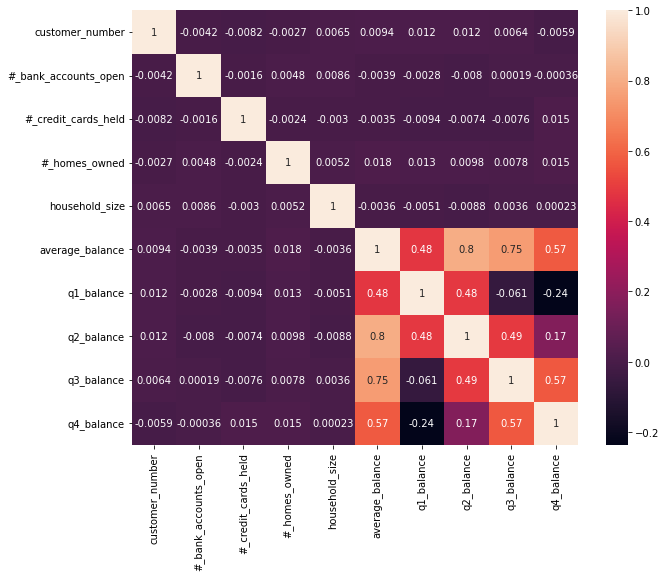

In [150]:
##checking the correlation of the numerical columns.
corr_matrix = data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [151]:
#There is high correlation betwenn q2, q3 balance with average balance. 
#I decided to only keep the average_balance for the first try out: data_avg1
#I am also dropping customer_number, as it doesn't add any value to the model. 

data_avg1 = data.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance', 'customer_number'], axis =1)

In [152]:
data_avg1

offer_accepted     reward mailer_type income_level  \
0                 No  Air Miles      Letter         High   
1                 No  Air Miles      Letter       Medium   
2                 No  Air Miles    Postcard         High   
3                 No  Air Miles      Letter       Medium   
4                 No  Air Miles      Letter       Medium   
...              ...        ...         ...          ...   
17995             No  Cash Back      Letter         High   
17996             No  Cash Back      Letter         High   
17997             No  Cash Back      Letter         High   
17998             No  Cash Back      Letter       Medium   
17999             No  Cash Back      Letter          Low   

       #_bank_accounts_open overdraft_protection credit_rating  \
0                         1                   No          High   
1                         1                   No        Medium   
2                         2                   No        Medium   
3                         2                   No          High   
4                         1                   No        Medium   
...                     ...                  ...           ...   
17995                     1                   No           Low   
17996                     1                   No           Low   
17997                     1                   No           Low   
17998                     1                   No        Medium   
17999                     2                   No        Medium   

       #_credit_cards_held  #_homes_owned  household_size own_your_home  \
0                        2              1               4            No   
1                        2              2               5           Yes   
2                        2              1               2           Yes   
3                        1              1               4            No   
4                        2              1               6           Yes   
...                    ...            ...             ...           ...   
17995                    1              1               5           Yes   
17996                    3              1               3           Yes   
17997                    2              1               4            No   
17998                    4              2               2           Yes   
17999                    2              1               3            No   

       average_balance  
0              1160.75  
1               147.25  
2               276.50  
3              1219.00  
4              1211.00  
...                ...  
17995           167.50  
17996           850.50  
17997          1087.25  
17998          1022.25  
17999          1056.00  

[17976 rows x 12 columns]

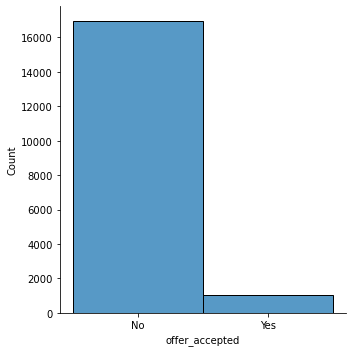

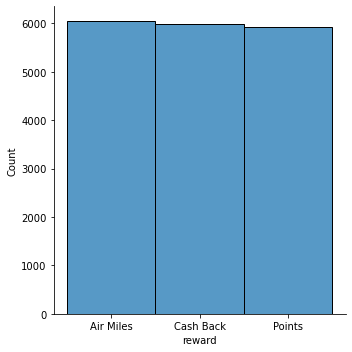

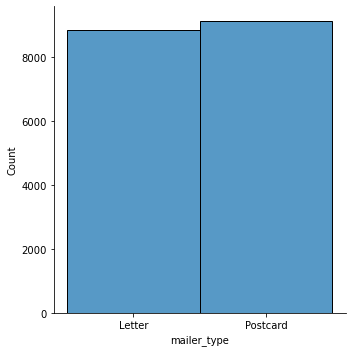

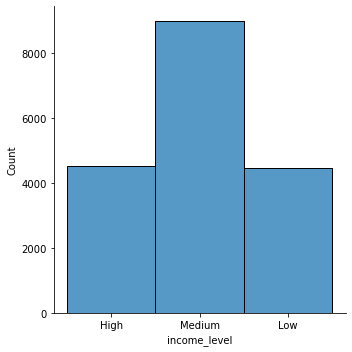

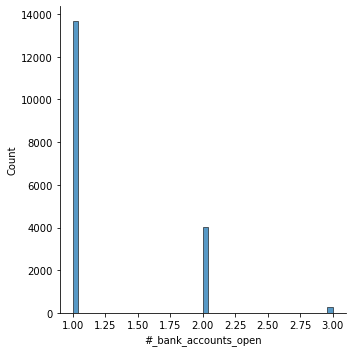

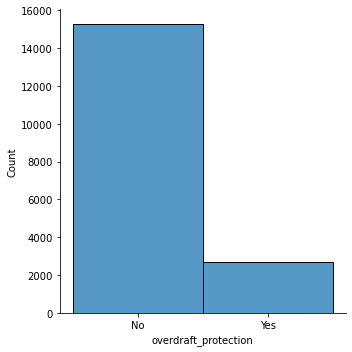

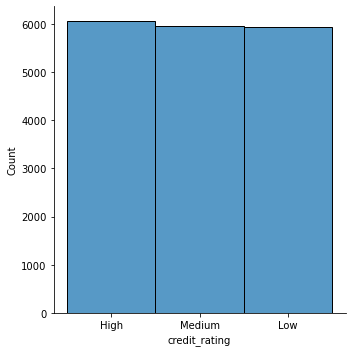

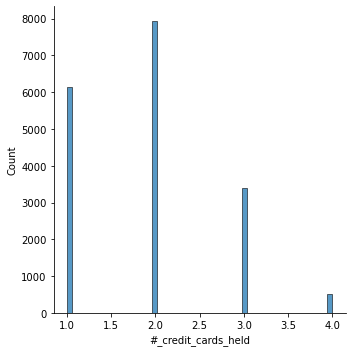

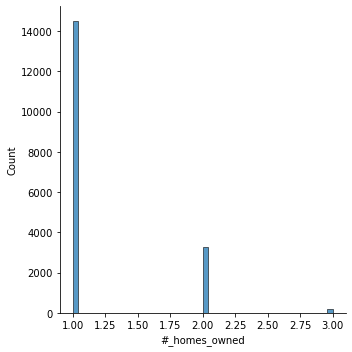

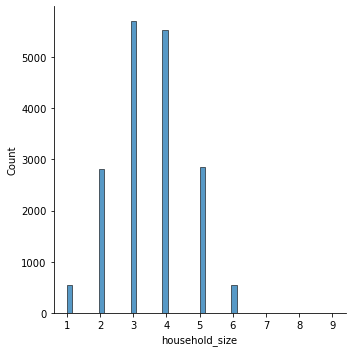

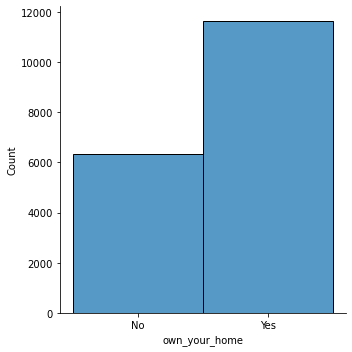

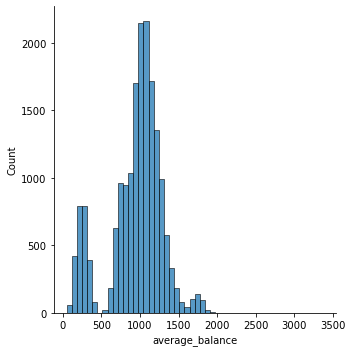

In [153]:
##Using histogram to see how the data distribute in all features

for col in data_avg1.columns:
    sns.displot(data = data_avg1[col], bins = 50)
plt.show()

##google how to normalize discrete numerical features. 
##own_your_home = under sample and oversample at the same time. 

<AxesSubplot:xlabel='average_balance'>

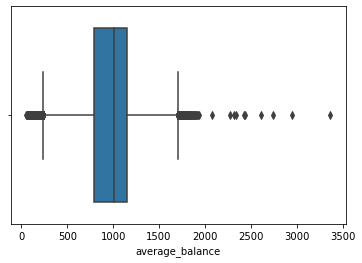

In [154]:
## Using boxplot to understand the distribution of the column 'average_balance'
sns.boxplot(x = data_avg1['average_balance'])    

In [155]:
##Taking a deep look of the categorical data

for col in data_avg1.columns:
    a = data_avg1[col].value_counts()
    print(a)

No     16955
Yes     1021
Name: offer_accepted, dtype: int64
Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64
Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64
Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64
1    13674
2     4007
3      295
Name: #_bank_accounts_open, dtype: int64
No     15300
Yes     2676
Name: overdraft_protection, dtype: int64
High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64
2    7933
1    6147
3    3381
4     515
Name: #_credit_cards_held, dtype: int64
1    14502
2     3289
3      185
Name: #_homes_owned, dtype: int64
3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64
Yes    11636
No      6340
Name: own_your_home, dtype: int64
1127.00    17
1070.00    16
1036.00    16
1078.50    16
1053.50    16
           ..
412.25      1
402.00      1
394.75      1
836.75      1
1427.25     1
Name: average_bala

In [156]:
##income_level, credit_rating convert to numerical features, as there is a level increasing in these features

data_avg1['income_level'].replace({"High":"3", "Medium" : "2", "Low" : "1"}, inplace=True)
data_avg1['credit_rating'].replace({"High":"3", "Medium" : "2", "Low" : "1"}, inplace=True)

In [157]:
data_avg1

offer_accepted     reward mailer_type income_level  \
0                 No  Air Miles      Letter            3   
1                 No  Air Miles      Letter            2   
2                 No  Air Miles    Postcard            3   
3                 No  Air Miles      Letter            2   
4                 No  Air Miles      Letter            2   
...              ...        ...         ...          ...   
17995             No  Cash Back      Letter            3   
17996             No  Cash Back      Letter            3   
17997             No  Cash Back      Letter            3   
17998             No  Cash Back      Letter            2   
17999             No  Cash Back      Letter            1   

       #_bank_accounts_open overdraft_protection credit_rating  \
0                         1                   No             3   
1                         1                   No             2   
2                         2                   No             2   
3                         2                   No             3   
4                         1                   No             2   
...                     ...                  ...           ...   
17995                     1                   No             1   
17996                     1                   No             1   
17997                     1                   No             1   
17998                     1                   No             2   
17999                     2                   No             2   

       #_credit_cards_held  #_homes_owned  household_size own_your_home  \
0                        2              1               4            No   
1                        2              2               5           Yes   
2                        2              1               2           Yes   
3                        1              1               4            No   
4                        2              1               6           Yes   
...                    ...            ...             ...           ...   
17995                    1              1               5           Yes   
17996                    3              1               3           Yes   
17997                    2              1               4            No   
17998                    4              2               2           Yes   
17999                    2              1               3            No   

       average_balance  
0              1160.75  
1               147.25  
2               276.50  
3              1219.00  
4              1211.00  
...                ...  
17995           167.50  
17996           850.50  
17997          1087.25  
17998          1022.25  
17999          1056.00  

[17976 rows x 12 columns]

### Modeling: Model N1 
#without any feature engineering
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [158]:
##Encoding categorical data
data_avg_m1 = pd.get_dummies(data_avg1, columns = ['offer_accepted','reward', 'mailer_type', 'overdraft_protection', 'own_your_home'], drop_first = True)


In [159]:
##Converting data type
data_avg_m1['income_level'] = data_avg_m1['income_level'].astype('int')
data_avg_m1['credit_rating'] = data_avg_m1['credit_rating'].astype('int')

In [160]:
data_avg_m1

income_level  #_bank_accounts_open  credit_rating  #_credit_cards_held  \
0                 3                     1              3                    2   
1                 2                     1              2                    2   
2                 3                     2              2                    2   
3                 2                     2              3                    1   
4                 2                     1              2                    2   
...             ...                   ...            ...                  ...   
17995             3                     1              1                    1   
17996             3                     1              1                    3   
17997             3                     1              1                    2   
17998             2                     1              2                    4   
17999             1                     2              2                    2   

       #_homes_owned  household_size  average_balance  offer_accepted_Yes  \
0                  1               4          1160.75                   0   
1                  2               5           147.25                   0   
2                  1               2           276.50                   0   
3                  1               4          1219.00                   0   
4                  1               6          1211.00                   0   
...              ...             ...              ...                 ...   
17995              1               5           167.50                   0   
17996              1               3           850.50                   0   
17997              1               4          1087.25                   0   
17998              2               2          1022.25                   0   
17999              1               3          1056.00                   0   

       reward_Cash Back  reward_Points  mailer_type_Postcard  \
0                     0              0                     0   
1                     0              0                     0   
2                     0              0                     1   
3                     0              0                     0   
4                     0              0                     0   
...                 ...            ...                   ...   
17995                 1              0                     0   
17996                 1              0                     0   
17997                 1              0                     0   
17998                 1              0                     0   
17999                 1              0                     0   

       overdraft_protection_Yes  own_your_home_Yes  
0                             0                  0  
1                             0                  1  
2                             0                  1  
3                             0                  0  
4                             0                  1  
...                         ...                ...  
17995                         0                  1  
17996                         0                  1  
17997                         0                  0  
17998                         0                  1  
17999                         0                  0  

[17976 rows x 13 columns]

In [161]:
data_avg_m1.to_csv('data_avg_m1.csv', index = False)

In [243]:
data_avg_m1=pd.read_csv('data_avg_m1.csv')

In [244]:
X = data_avg_m1.drop(['offer_accepted_Yes'], axis =1)
y = data_avg_m1['offer_accepted_Yes']


In [164]:
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [246]:
##building a linear Regression model
from sklearn import linear_model
lm = linear_model.LinearRegression()
model1 = lm.fit(X_train, y_train)
score = lm.score(X_test,y_test)
score

0.044779978444245416

In [247]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = sm.add_constant(X)
model1 = sm.OLS(y,X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     offer_accepted_Yes   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     70.39
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          5.35e-169
Time:                        21:20:27   Log-Likelihood:                 1211.6
No. Observations:               17976   AIC:                            -2397.
Df Residuals:                   17963   BIC:                            -2296.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


print(model1.)

In [170]:
##building KNN model

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

KNN = KNeighborsRegressor(n_neighbors=6, weights = 'distance')
KNN.fit(X_train, y_train)
score = KNN.score(X_test, y_test)
score

-0.1286956397737793

In [248]:
##Logistic model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

##check the predict data
Y_train_perditct = classification.predict(X_train)
Y_test_perditct = classification.predict(X_test)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


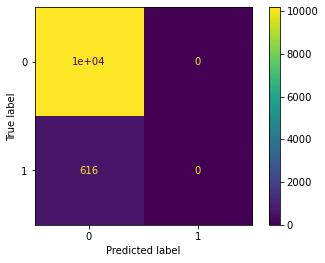

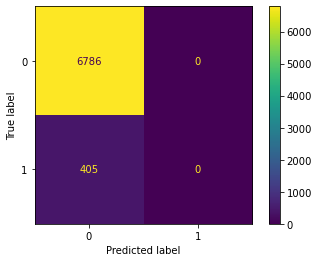

In [250]:
##to see the accurracy
plot_confusion_matrix(classification,X_train, y_train)
plot_confusion_matrix(classification,X_test, y_test)
##As you can see, this model is only able to predict "no". 

In [251]:
classification.score(X_test, y_test)

0.9436795994993742

In [252]:
print(classification_report(y_train, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10169
           1       0.00      0.00      0.00       616

    accuracy                           0.94     10785
   macro avg       0.47      0.50      0.49     10785
weighted avg       0.89      0.94      0.92     10785
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      6786
           1       0.00      0.00      0.00       405

    accuracy                           0.94      7191
   macro avg       0.47      0.50      0.49      7191
weighted avg       0.89      0.94      0.92      7191



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/si

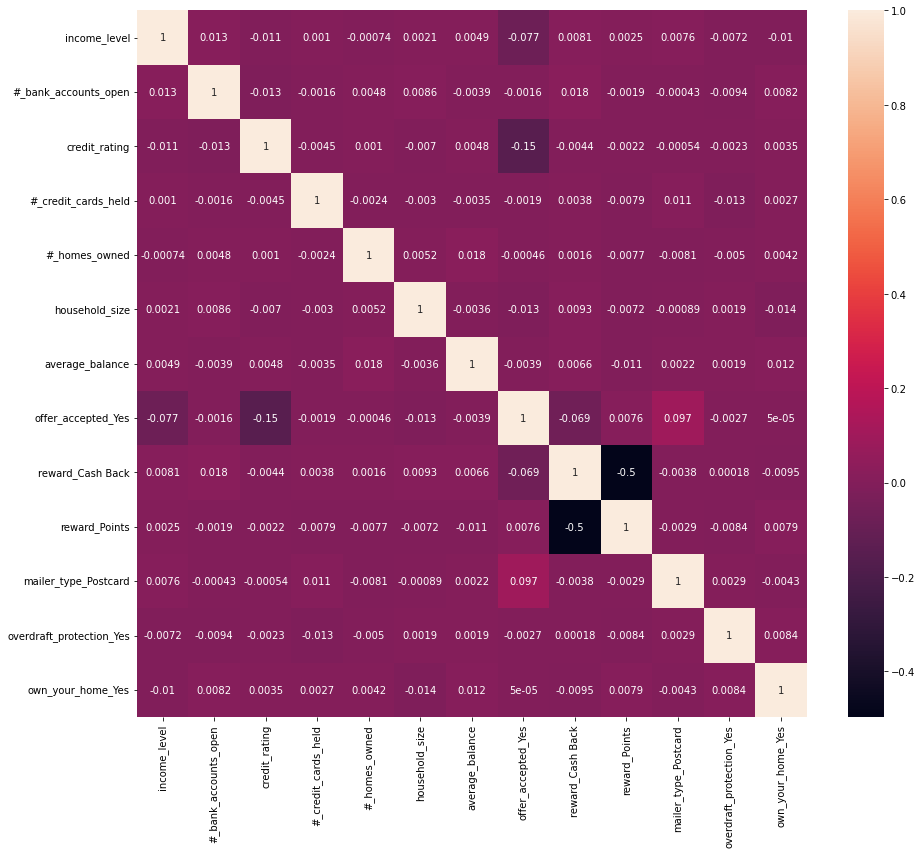

In [171]:
corr_matrix = data_avg_m1.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (15, 13))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

### Modeling: Model N2 
#cleaning the outliers in Average income
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [295]:
##In this model, what I will do is: Clean out the outliers in average_balance, and scale it

data_avg_m2 = pd.read_csv('data_avg_m1.csv')

In [296]:
iqr = np.percentile(data_avg_m2['average_balance'], 75)- np.percentile(data_avg_m2['average_balance'], 25)
upper_limit = np.percentile(data_avg_m2['average_balance'], 75) + 1.5*iqr
lower_limit = np.percentile(data_avg_m2['average_balance'], 75) - 1.5*iqr
data_avg_m2['average_balance'] = data_avg_m2[(data_avg_m2['average_balance']>lower_limit) & (data_avg_m2['average_balance']<upper_limit)]['average_balance']

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_balance'>

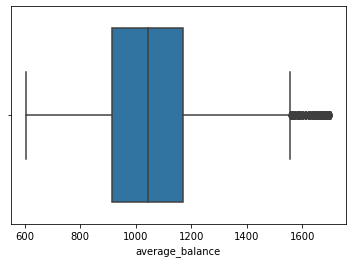

In [297]:
sns.boxplot(data_avg_m2['average_balance'])

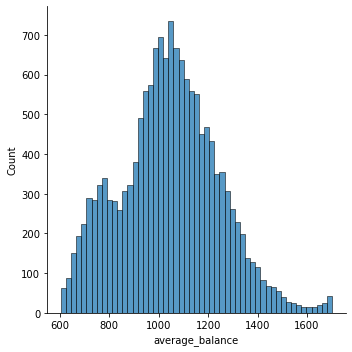

In [298]:
sns.displot(data_avg_m2['average_balance'])

In [299]:
data_avg_m2.isna().sum()

income_level                   0
#_bank_accounts_open           0
credit_rating                  0
#_credit_cards_held            0
#_homes_owned                  0
household_size                 0
average_balance             2871
offer_accepted_Yes             0
reward_Cash Back               0
reward_Points                  0
mailer_type_Postcard           0
overdraft_protection_Yes       0
own_your_home_Yes              0
dtype: int64

In [300]:
data_avg_m2 = data_avg_m2[~(data_avg_m2['average_balance'].isna())]

In [301]:
data_avg_m2.to_csv('data_avg_m2.csv', index = False)

In [259]:
data_num = data_avg_m2.drop(['offer_accepted_Yes'], axis = 1)

In [260]:
data_num

income_level  #_bank_accounts_open  credit_rating  #_credit_cards_held  \
0                 3                     1              3                    2   
3                 2                     2              3                    1   
4                 2                     1              2                    2   
5                 2                     1              3                    3   
8                 2                     1              1                    2   
...             ...                   ...            ...                  ...   
17970             2                     1              1                    2   
17972             3                     1              1                    3   
17973             3                     1              1                    2   
17974             2                     1              2                    4   
17975             1                     2              2                    2   

       #_homes_owned  household_size  average_balance  reward_Cash Back  \
0                  1               4          1160.75                 0   
3                  1               4          1219.00                 0   
4                  1               6          1211.00                 0   
5                  1               4          1114.75                 0   
8                  1               4          1005.00                 0   
...              ...             ...              ...               ...   
17970              1               2           985.25                 0   
17972              1               3           850.50                 1   
17973              1               4          1087.25                 1   
17974              2               2          1022.25                 1   
17975              1               3          1056.00                 1   

       reward_Points  mailer_type_Postcard  overdraft_protection_Yes  \
0                  0                     0                         0   
3                  0                     0                         0   
4                  0                     0                         0   
5                  0                     0                         0   
8                  0                     1                         0   
...              ...                   ...                       ...   
17970              0                     1                         0   
17972              0                     0                         0   
17973              0                     0                         0   
17974              0                     0                         0   
17975              0                     0                         0   

       own_your_home_Yes  
0                      0  
3                      0  
4                      1  
5                      0  
8                      1  
...                  ...  
17970                  1  
17972                  1  
17973                  0  
17974                  1  
17975                  0  

[15105 rows x 12 columns]

In [261]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data_num)
data_num_standard = transformer.transform(data_num)

In [262]:
y = data_avg_m2['offer_accepted_Yes']
X = data_num_standard

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [264]:
##Classification model: 
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [265]:
classification.score(X_test, y_test)

0.943230718305197

In [266]:
##check the predict data
Y_train_perditct = classification.predict(X_train)
Y_test_perditct = classification.predict(X_test)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


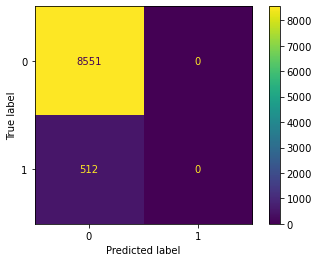

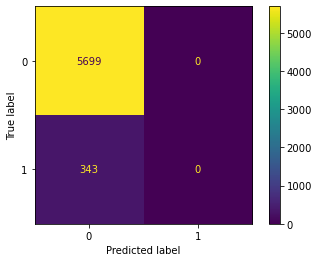

In [267]:
##to see the accurracy
plot_confusion_matrix(classification,X_train, y_train)
plot_confusion_matrix(classification,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [268]:
print(classification_report(y_train, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8551
           1       0.00      0.00      0.00       512

    accuracy                           0.94      9063
   macro avg       0.47      0.50      0.49      9063
weighted avg       0.89      0.94      0.92      9063
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5699
           1       0.00      0.00      0.00       343

    accuracy                           0.94      6042
   macro avg       0.47      0.50      0.49      6042
weighted avg       0.89      0.94      0.92      6042



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/si

### Modeling: Model N3 
#deal with the inbalance data.
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [269]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [270]:
data_avg_m3=pd.read_csv('data_avg_m1.csv')

In [271]:
X = data_avg_m3.drop(['offer_accepted_Yes'], axis =1)
y = data_avg_m3['offer_accepted_Yes']


In [272]:
##Split the train and test data before dealing with the inbalabce data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [273]:
#under sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=10)
X_rus, Y_rus = rus.fit_resample(X_train,y_train)
Y_rus.value_counts()

0    616
1    616
Name: offer_accepted_Yes, dtype: int64

In [274]:
classification_random_under = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_rus, Y_rus)


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [275]:
classification_random_under.score(X_test, y_test)

0.6679182311222361

In [276]:
#under sampling using TomekLinks
t1 = TomekLinks()
X_under,Y_under = t1.fit_resample(X_train,y_train)
Y_under.value_counts()

0    9904
1     616
Name: offer_accepted_Yes, dtype: int64

In [277]:
classification_tomeklinks = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_under,Y_under)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:
classification_tomeklinks.score(X_test, y_test)

0.9436795994993742

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/ba

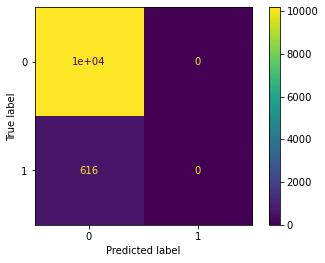

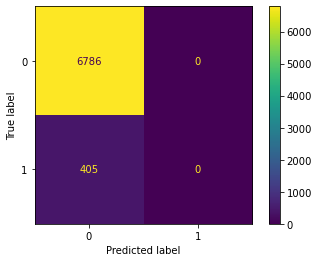

In [279]:
##to see the accurracy
plot_confusion_matrix(classification,X_train, y_train)
plot_confusion_matrix(classification,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [280]:
##Over Sampling
#over sampling using RandomoverSampler
ros = RandomOverSampler(random_state=10)
X_rus, Y_rus = ros.fit_resample(X_train,y_train)
Y_rus.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [281]:
classification_random_over = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_rus, Y_rus)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [282]:
classification_random_over.score(X_test, y_test)

0.672646363509943

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


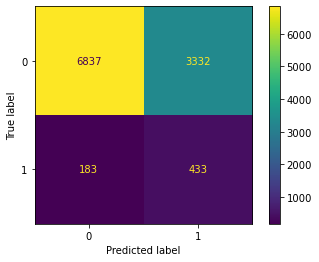

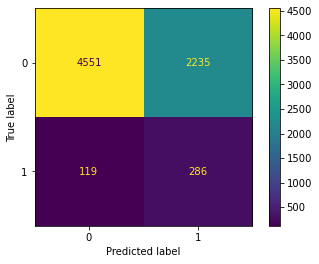

In [285]:
##to see the accurracy
plot_confusion_matrix(classification_random_over ,X_train, y_train)
plot_confusion_matrix(classification_random_over ,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [314]:
##Over Sampling
#over sampling using SMOTE
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train,y_train)
Y_res.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [315]:
classification_smote = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_res, Y_res)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [316]:
classification_smote.score(X_test, y_test)

0.7972465581977471

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


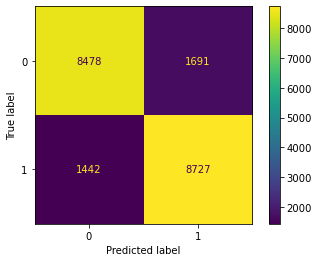

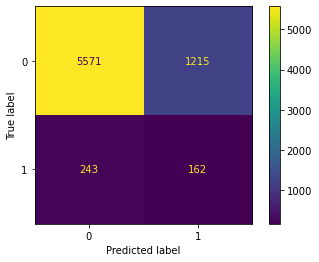

In [318]:
##to see the accurracy
plot_confusion_matrix(classification_smote,X_res, Y_res)
plot_confusion_matrix(classification_smote,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [313]:
Y_train_perditct = classification_smote.predict(X_res)
Y_test_perditct = classification_smote.predict(X_test)

In [ ]:
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

### Modeling: Model N4 
#deal with the inbalance data.
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [321]:
data_avg_m4=pd.read_csv('data_avg_m2.csv')

In [322]:
X = data_avg_m4.drop(['offer_accepted_Yes'], axis =1)
y = data_avg_m4['offer_accepted_Yes']

In [341]:
X = data_avg_m4.drop(['offer_accepted_Yes', 'overdraft_protection_Yes'], axis =1)
y = data_avg_m4['offer_accepted_Yes']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [343]:
ros = RandomOverSampler(random_state=10)
X_rus, Y_rus = ros.fit_resample(X_train,y_train)
Y_rus.value_counts()

1    8551
0    8551
Name: offer_accepted_Yes, dtype: int64

In [344]:
classification_random_over = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_rus, Y_rus)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [345]:
classification_random_over.score(X_test, y_test)

0.6746110559417412

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


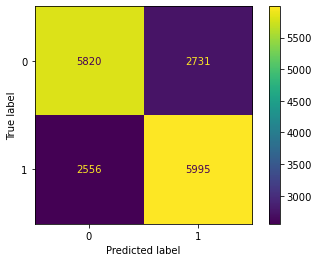

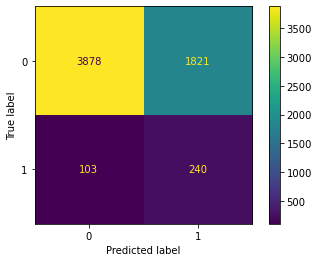

In [327]:
##to see the accurracy
plot_confusion_matrix(classification_random_over ,X_rus, Y_rus)
plot_confusion_matrix(classification_random_over ,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [346]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train,y_train)
Y_res.value_counts()

1    8551
0    8551
Name: offer_accepted_Yes, dtype: int64

In [347]:
classification_smote = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_res, Y_res)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [348]:
classification_smote.score(X_test, y_test)

0.8096656736180072

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


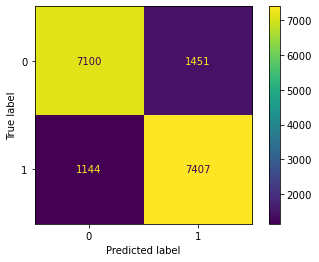

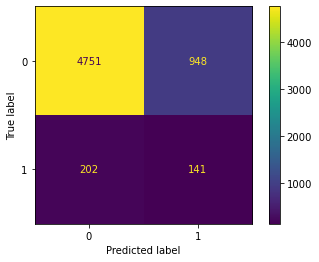

In [349]:
##to see the accurracy
plot_confusion_matrix(classification_smote ,X_res, Y_res)
plot_confusion_matrix(classification_smote ,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [350]:
Y_train_perditct = classification_smote.predict(X_res)
Y_test_perditct = classification_smote.predict(X_test)

In [351]:
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      8551
           1       0.84      0.87      0.85      8551

    accuracy                           0.85     17102
   macro avg       0.85      0.85      0.85     17102
weighted avg       0.85      0.85      0.85     17102
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      5699
           1       0.13      0.41      0.20       343

    accuracy                           0.81      6042
   macro avg       0.54      0.62      0.54      6042
weighted avg       0.91      0.81      0.85      6042

